Pertama-tama, masukkan library yg akan membantu kita

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

combats.csv
pokemon.csv
tests.csv



In [3]:
data = pd.read_csv('./input/pokemon.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
name          799 non-null object
type1         800 non-null object
type2         414 non-null object
hp            800 non-null int64
attack        800 non-null int64
defense       800 non-null int64
specatk       800 non-null int64
specdef       800 non-null int64
speed         800 non-null int64
generation    800 non-null int64
legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [8]:
# lihat korelasi antar features
# tapi, correlation does not imply causation
# If they are both above their mean (or both below), then this will produce a positive number, 
# because a positive×positive=positive, and likewise a negative×negative=positive.

# min_periods : int, optional => Minimum number of observations required 

# correlations = data.corr() # default: pearson
# correlations = data.corr(method='spearman',min_periods=1)
# correlations =  data.corr(method='pearson',min_periods=1)
correlations = data.corr(method='kendall')

correlations

,#,hp,attack,defense,specatk,specdef,speed,generation,legendary
#,1.000000,0.082998,0.068928,0.079238,0.061706,0.052774,0.012898,0.908018,0.126093
hp,0.082998,1.000000,0.413993,0.324233,0.338039,0.357735,0.180047,0.060275,0.245886
attack,0.068928,0.413993,1.000000,0.369529,0.258397,0.223371,0.259124,0.037858,0.261976
defense,0.079238,0.324233,0.369529,1.000000,0.220791,0.451869,0.063026,0.041291,0.222471
specatk,0.061706,0.338039,0.258397,0.220791,1.000000,0.422981,0.329196,0.029021,0.308598
specdef,0.052774,0.357735,0.223371,0.451869,0.422981,1.000000,0.222677,0.013420,0.273571
speed,0.012898,0.180047,0.259124,0.063026,0.329196,0.222677,1.000000,-0.010233,0.259365
generation,0.908018,0.060275,0.037858,0.041291,0.029021,0.013420,-0.010233,1.000000,0.070160
legendary,0.126093,0.245886,0.261976,0.222471,0.308598,0.273571,0.259365,0.070160,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

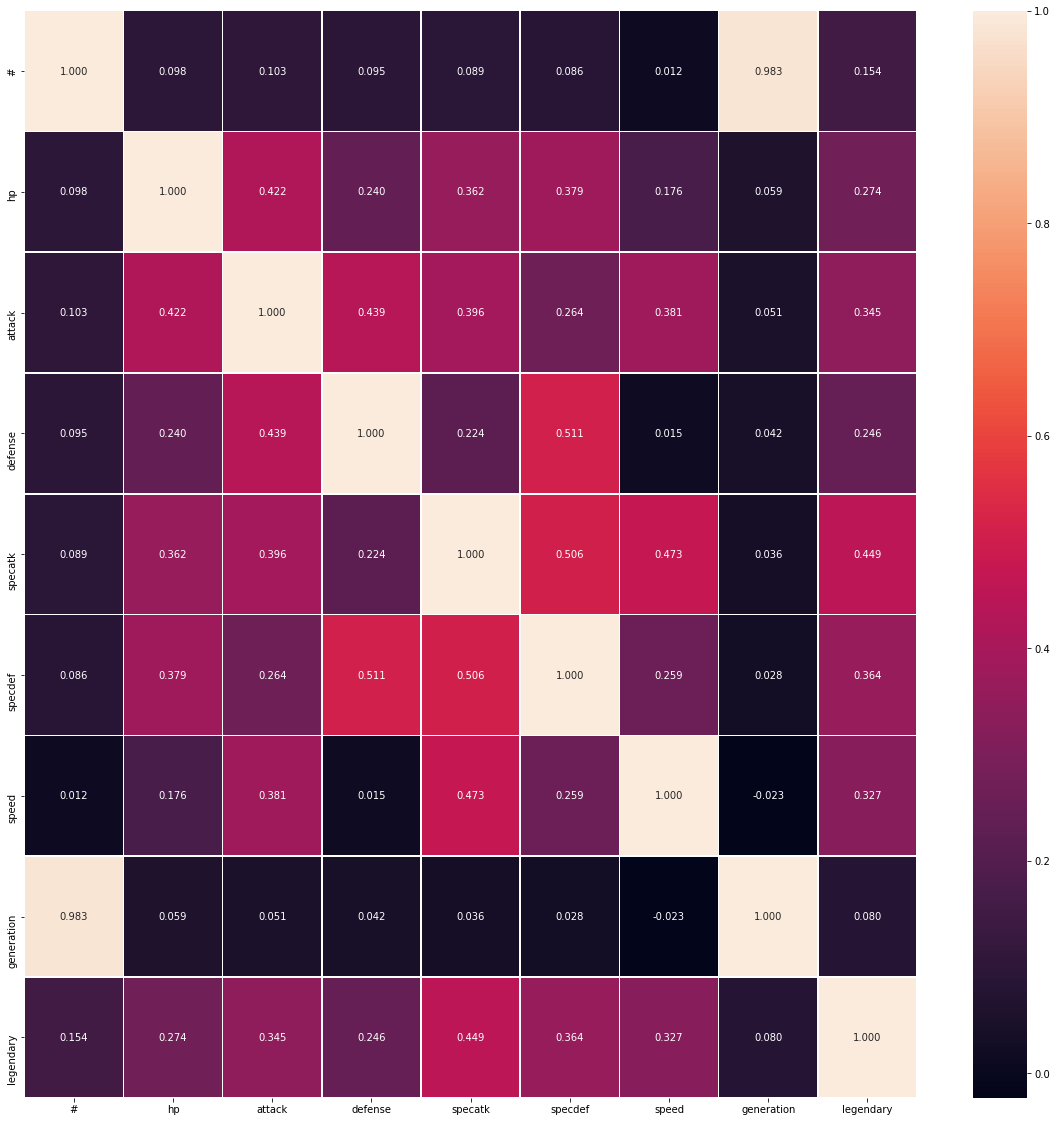

In [7]:
# correlation map
# higher correlations are brighter
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, linewidths=.5, fmt='.3f', ax=ax)
plt.show

In [6]:
# print contoh 5 data dulu
data.head(20)

,#,name,type1,type2,hp,attack,defense,specatk,specdef,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [28]:
data.tail()

,#,name,type1,type2,hp,attack,defense,specatk,specdef,speed,generation,legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [29]:
data.shape

(800, 12)

In [30]:
# lihat kolomnya ada apa aja di data yg kita punya
data.columns

Index(['#', 'name', 'type1', 'type2', 'hp', 'attack', 'defense', 'specatk',
       'specdef', 'speed', 'generation', 'legendary'],
      dtype='object')

# Plotting using Matplotlib

Matplotlib adalah sebuah library untuk ngulik visualisasi. 

In [10]:
data.columns.values.tolist()

['#',
 'name',
 'type1',
 'type2',
 'hp',
 'attack',
 'defense',
 'specatk',
 'specdef',
 'speed',
 'generation',
 'legendary']

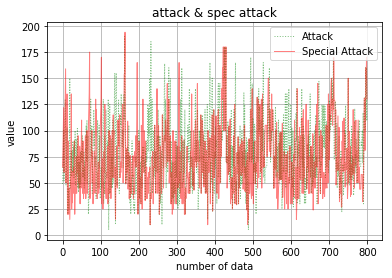

In [12]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.attack.plot(kind='line', color='g',label='Attack', linewidth=1,alpha=.5, grid=True,linestyle=':')
data.specatk.plot(kind='line', color='r',label='Special Attack',linewidth=1,alpha=.5, grid=True,linestyle='-')
plt.legend(loc='upper right') # put label in image
plt.xlabel('number of data')
plt.ylabel('value')
plt.title('attack & spec attack')
plt.show()

Text(0.5,1,'Attack Defense Scatter Plot')

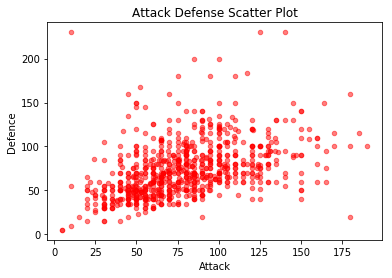

In [13]:
# scatter plot
# x = attack y = defense
data.plot(kind='scatter', x='attack',y='defense',alpha=.5, color='red')
plt.xlabel('Attack')
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')

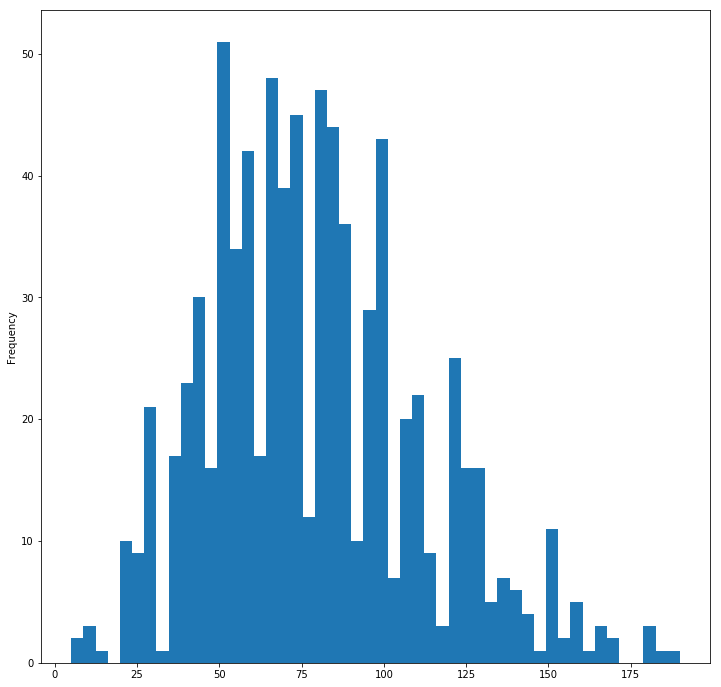

In [14]:
# histogram vis
data.attack.plot(kind='hist', bins = 50, figsize=(12,12))
plt.show()

In [20]:
# data filtering
x = data['attack']>170
data[x]

,#,name,type1,type2,hp,attack,defense,specatk,specdef,speed,generation,legendary
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
232,233,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True


In [26]:
# filtering with logic 
y = np.logical_and(data['defense']>150, data['attack']>120)
data[y]

,#,name,type1,type2,hp,attack,defense,specatk,specdef,speed,generation,legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True


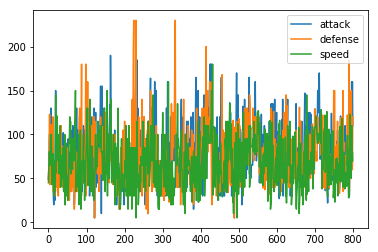

In [33]:
# plotting all the data
data1 = data
data1 = data.loc[:,["attack","defense","speed"]]
data1.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22671f28>,
      dtype=object)

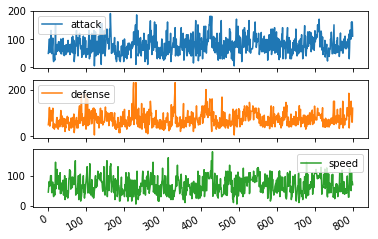

In [34]:
data1.plot(subplots = True)

<module 'matplotlib.pyplot' from '/Users/eliandaiva/anaconda2/envs/ml_py35/lib/python3.5/site-packages/matplotlib/pyplot.py'>

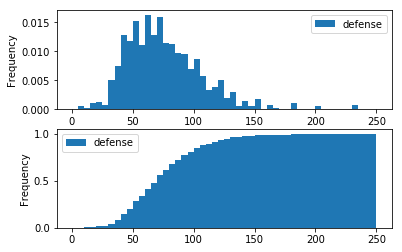

In [40]:
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist", y="defense",bins=50,range=(0,250),density=True,ax=axes[0])
data1.plot(kind = "hist", y="defense",bins=50,range=(0,250),density=True,ax=axes[1],cumulative=True)
plt.savefig('graph.png')
plt

### Deskripsi data via pandas

In [45]:
data.describe()

,#,hp,attack,defense,specatk,specdef,speed,generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [46]:
data.head()

,#,name,type1,type2,hp,attack,defense,specatk,specdef,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [50]:
data2 = data.set_index(["type1","type2"])
data2.head(50)

#              name   hp  attack  defense  specatk  specdef  \
type1    type2                                                                  
Grass    Poison   1         Bulbasaur   45      49       49       65       65   
         Poison   2           Ivysaur   60      62       63       80       80   
         Poison   3          Venusaur   80      82       83      100      100   
         Poison   4     Mega Venusaur   80     100      123      122      120   
Fire     NaN      5        Charmander   39      52       43       60       50   
         NaN      6        Charmeleon   58      64       58       80       65   
         Flying   7         Charizard   78      84       78      109       85   
         Dragon   8  Mega Charizard X   78     130      111      130       85   
         Flying   9  Mega Charizard Y   78     104       78      159      115   
Water    NaN     10          Squirtle   44      48       65       50       64   
         NaN     11         Wartortle   59      63       80       65       80   
         NaN     12         Blastoise   79      83      100       85      105   
         NaN     13    Mega Blastoise   79     103      120      135      115   
Bug      NaN     14          Caterpie   45      30       35       20       20   
         NaN     15           Metapod   50      20       55       25       25   
         Flying  16        Butterfree   60      45       50       90       80   
         Poison  17            Weedle   40      35       30       20       20   
         Poison  18            Kakuna   45      25       50       25       25   
         Poison  19          Beedrill   65      90       40       45       80   
         Poison  20     Mega Beedrill   65     150       40       15       80   
Normal   Flying  21            Pidgey   40      45       40       35       35   
         Flying  22         Pidgeotto   63      60       55       50       50   
         Flying  23           Pidgeot   83      80       75       70       70   
         Flying  24      Mega Pidgeot   83      80       80      135       80   
         NaN     25           Rattata   30      56       35       25       35   
         NaN     26          Raticate   55      81       60       50       70   
         Flying  27           Spearow   40      60       30       31       31   
         Flying  28            Fearow   65      90       65       61       61   
Poison   NaN     29             Ekans   35      60       44       40       54   
         NaN     30             Arbok   60      85       69       65       79   
Electric NaN     31           Pikachu   35      55       40       50       50   
         NaN     32            Raichu   60      90       55       90       80   
Ground   NaN     33         Sandshrew   50      75       85       20       30   
         NaN     34         Sandslash   75     100      110       45       55   
Poison   NaN     35          Nidoran♀   55      47       52       40       40   
         NaN     36          Nidorina   70      62       67       55       55   
         Ground  37         Nidoqueen   90      92       87       75       85   
         NaN     38          Nidoran♂   46      57       40       40       40   
         NaN     39          Nidorino   61      72       57       55       55   
         Ground  40          Nidoking   81     102       77       85       75   
Fairy    NaN     41          Clefairy   70      45       48       60       65   
         NaN     42          Clefable   95      70       73       95       90   
Fire     NaN     43            Vulpix   38      41       40       50       65   
         NaN     44         Ninetales   73      76       75       81      100   
Normal   Fairy   45        Jigglypuff  115      45       20       45       25   
         Fairy   46        Wigglytuff  140      70       45       85       50   
Poison   Flying  47             Zubat   40      45       35       30       40   
         Flying  48            Golbat   75      8